In [162]:
import warnings
warnings.filterwarnings('ignore')

In [163]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import datetime

In [166]:
start = datetime.datetime(2020, 1, 1) # 指定开始时间
end = datetime.datetime.now() # 指定结束时间
print(start, end)
code = '000568.SZ'

# 获取股票数据
stock_data = web.DataReader(code, 'yahoo', start, end)
# print(SS600036)
stock_data.to_csv("ipynb_data/{}.csv".format(code))
df = pd.read_csv("ipynb_data/{}.csv".format(code))
df.info()
df.head(10)

2020-01-01 00:00:00 2020-07-21 22:01:09.525422
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       132 non-null    object 
 1   High       132 non-null    float64
 2   Low        132 non-null    float64
 3   Open       132 non-null    float64
 4   Close      132 non-null    float64
 5   Volume     132 non-null    int64  
 6   Adj Close  132 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.3+ KB


,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,86.599998,83.680000,86.000000,85.449997,16734111,85.449997
1,2020-01-03,87.279999,85.190002,86.000000,85.790001,12465768,85.790001
2,2020-01-06,86.500000,84.589996,85.010002,85.620003,8720029,85.620003
3,2020-01-07,86.449997,84.699997,84.930000,86.000000,9184292,86.000000
4,2020-01-08,85.879997,84.559998,85.309998,84.849998,7214211,84.849998
5,2020-01-09,88.580002,84.599998,85.400002,87.500000,17676365,87.500000
6,2020-01-10,91.440002,87.300003,87.459999,90.500000,21465711,90.500000
7,2020-01-13,94.580002,90.400002,90.500000,93.029999,18976029,93.029999
8,2020-01-14,93.430000,91.500000,92.400002,92.070000,8973223,92.070000
9,2020-01-15,94.250000,92.000000,92.099998,92.339996,8907122,92.339996


In [168]:
df.isnull().values.sum()

0

In [169]:
#计算跌涨幅
df['Range'] = df['Close']  - df['Close'].shift(1)

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']
#⽤来正常显示中⽂标签
plt.rcParams['axes.unicode_minus']=False 
#⽤来正常显示负号 #有中⽂出现的情况，需要u'内容'

In [171]:
#调整数据索引
df.index = df.Date
df  =  df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Range']]

<AxesSubplot:title={'center':'000568.SZ tendency'}, xlabel='Date'>

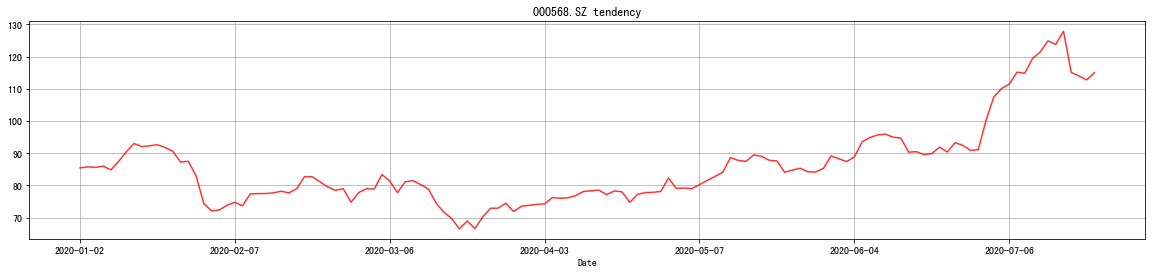

In [172]:
#简单查看股票价格走势图
df['Close'].plot(figsize=(20,4),
                 color = 'r',
                 alpha = 0.8,
                 grid = True,
                 rot = 0,
                 title='{} tendency'.format(code))

(<matplotlib.collections.LineCollection at 0x7f7f9f075d50>,
 <matplotlib.collections.PolyCollection at 0x7f7f9f075cd0>)

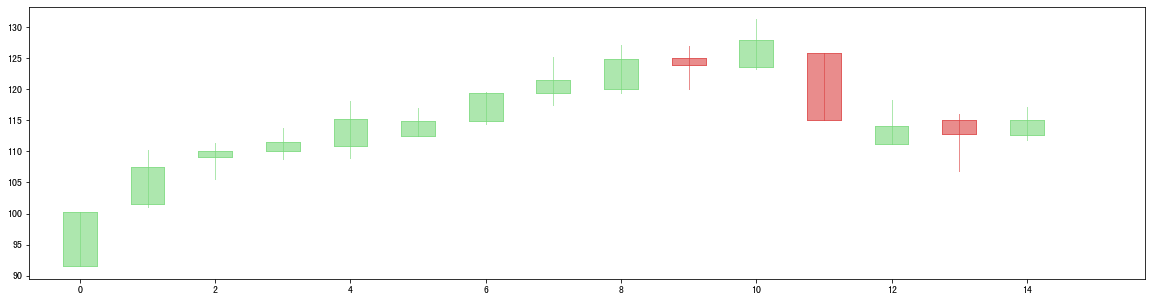

In [173]:
from mpl_finance import candlestick2_ohlc
y2020 = df['2020-07-01':'2020-08-01']
fig, ax = plt.subplots(figsize=(20,5))
candlestick2_ohlc(ax, y2020.Open, y2020.High, y2020.Low, y2020.Close, width=0.5, alpha =0.6, colorup='#77d879', 
colordown='#db3f3f')

<AxesSubplot:xlabel='Date'>

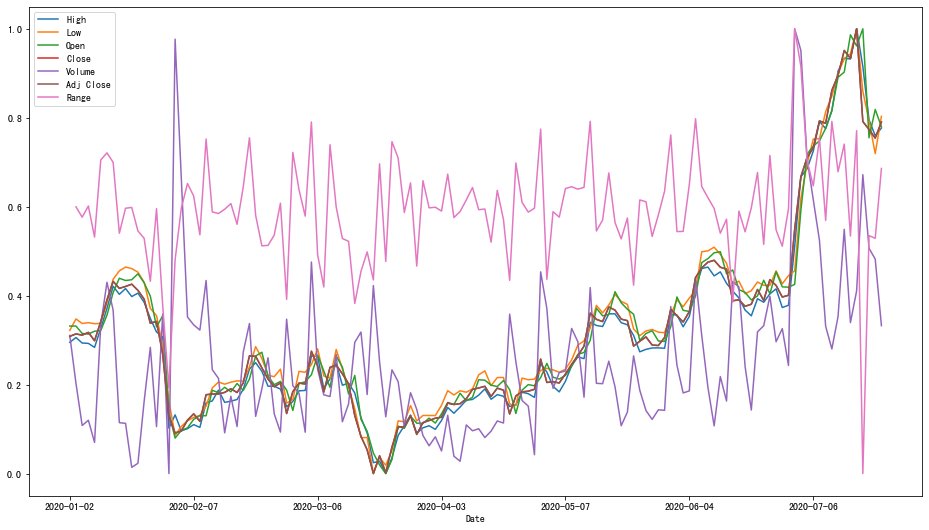

In [174]:
'''
    Min-Max 标准化是最常用的规范化手段
'''
df_min_max = (df - df.min()) / (df.max() - df.min())
df_min_max.plot(figsize=(16, 9))

In [183]:
#补充  使用Pycharts 工具包进行画K线图
# 导入pyecharts工具包，用pe作为简写
import pyecharts as pe
y2020 = df['2020-01-01':'2020-08-01']

# 提取x轴数据，即交易日期，同时转换为字符串形式
x = df.index.astype('str')

# 提取y轴数据，即绘制股票k线所必须的4个价格字段
y = y2020[['Open','Close','Low','High']].values

# 创建k线图对象，并设置大标题
kline = pe.Kline('2020_K线图_{}'.format(code))

# 绘制图表
kline.add('日', x, y,                           #图例名称，x轴数据，y轴数据
          is_datazoom_show=True,                #使用区域缩放组件
          datazoom_range=[97,100],              #设置区域缩放的范围，这里设置为末尾3%的k线数据
          mark_point=['max','min'],             #标记可视范围内开盘价最大值，最小值
          is_xaxislabel_align = True,           #设置x轴刻度与标签对齐
          tooltip_trigger ='axis',              #坐标轴触发弹窗提示
          tooltip_axispointer_type ='shadow')   #设置tooltip指示器

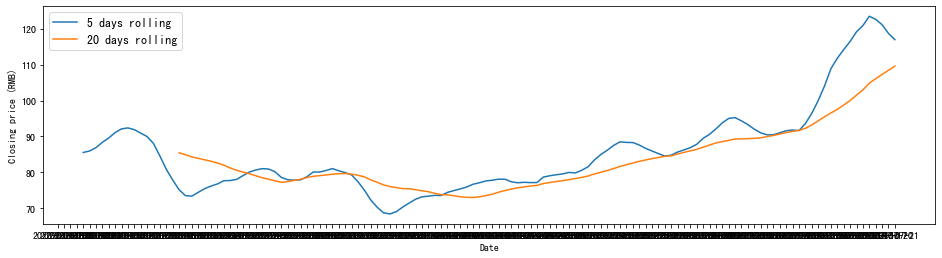

In [184]:
#计算5日线和10日线
y2020_close = y2020.Close
short_rolling = y2020_close.rolling(window=5).mean()
long_rolling = y2020_close.rolling(window=20).mean()

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(short_rolling.index, short_rolling, label='5 days rolling')
ax.plot(long_rolling.index, long_rolling, label='20 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (RMB)')
ax.legend(fontsize='large')

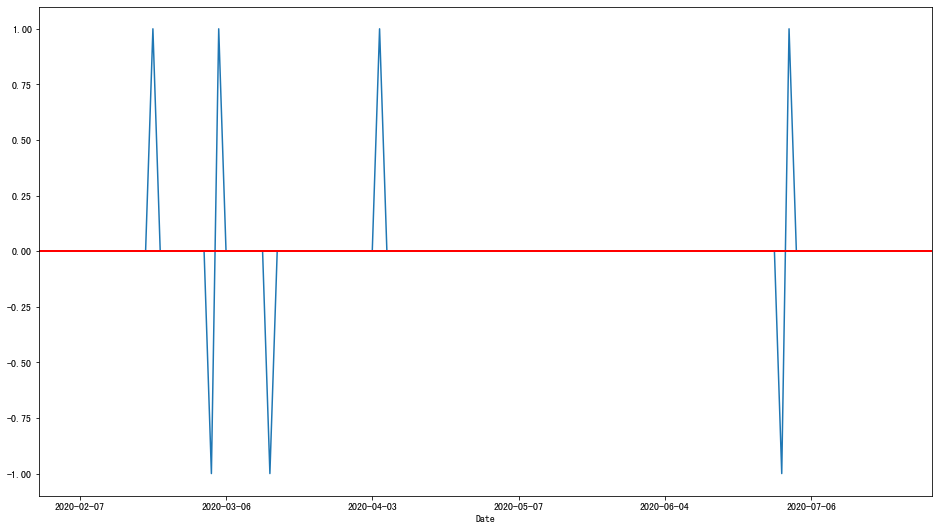

In [185]:
fig, ax = plt.subplots(figsize=(16,9))

short_long = np.sign(short_rolling - long_rolling)
buy_sell = np.sign(short_long - short_long.shift(1))
buy_sell.plot(ax=ax)
ax.axhline(y=0, color='red', lw=2)

In [186]:
buy_sell[buy_sell == 1]

Date
2020-02-21    1.0
2020-03-05    1.0
2020-04-07    1.0
2020-07-01    1.0
Name: Close, dtype: float64

In [187]:
buy_sell[buy_sell == -1]

Date
2020-03-04   -1.0
2020-03-16   -1.0
2020-06-30   -1.0
Name: Close, dtype: float64

In [188]:
#使用指标来绘制热力图
data = pd.merge(short_rolling,long_rolling,left_index=True,right_index=True)
print(data.head())

            Close_x  Close_y
Date                        
2020-01-02      NaN      NaN
2020-01-03      NaN      NaN
2020-01-06      NaN      NaN
2020-01-07      NaN      NaN
2020-01-08   85.542      NaN


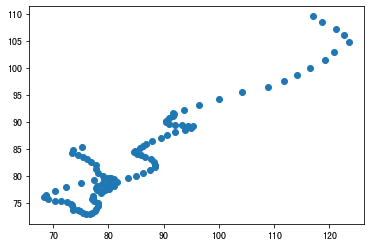

In [189]:
plt.scatter(data['Close_x'],data['Close_y'])

In [156]:
#加性模型预测Prophet
data = y2020['Close'].reset_index()
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})
print(data.head())

           ds            y
0  2020-01-02  1130.000000
1  2020-01-03  1078.560059
2  2020-01-06  1077.989990
3  2020-01-07  1094.530029
4  2020-01-08  1088.140015


In [159]:
import fbprophet
model = fbprophet.Prophet(changepoint_prior_scale=0.05, daily_seasonality=True) # 定义模型
model.fit(data) # 训练模型

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [160]:
forecast_df = model.make_future_dataframe(periods=45, freq='D') # 生成需预测序列
forecast = model.predict(forecast_df) # 模型预测

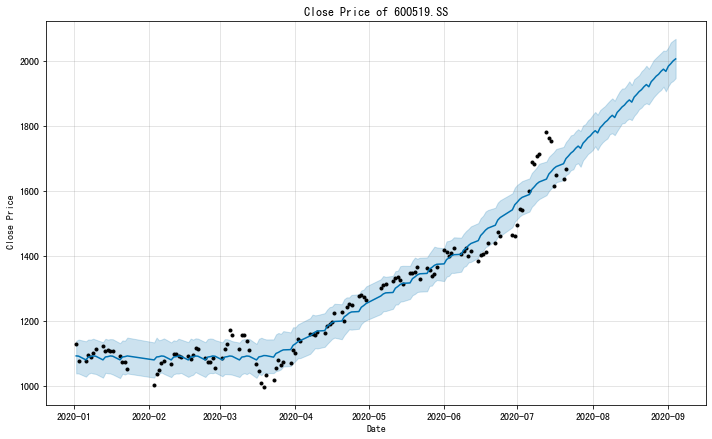

In [161]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Close Price ¥'); # 绘制预测图
plt.title('Close Price of {}'.format(code));

In [125]:
def plot(m, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y', plot_color='#0072B2'):
    """Plot the Prophet forecast.
    Parameters
    ----------
    m: Prophet model.
    fcst: pd.DataFrame output of m.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    Returns
    -------
    A matplotlib figure.
    """
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=(10, 6))
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    fcst_t = fcst['ds'].dt.to_pydatetime()
    ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.')
    ax.plot(fcst_t, fcst['yhat'], ls='-', c=plot_color)
    if 'cap' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['cap'], ls='--', c='k')
    if m.logistic_floor and 'floor' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['floor'], ls='--', c='k')
    if uncertainty:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'],
                        color=plot_color, alpha=0.2)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    return fig

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


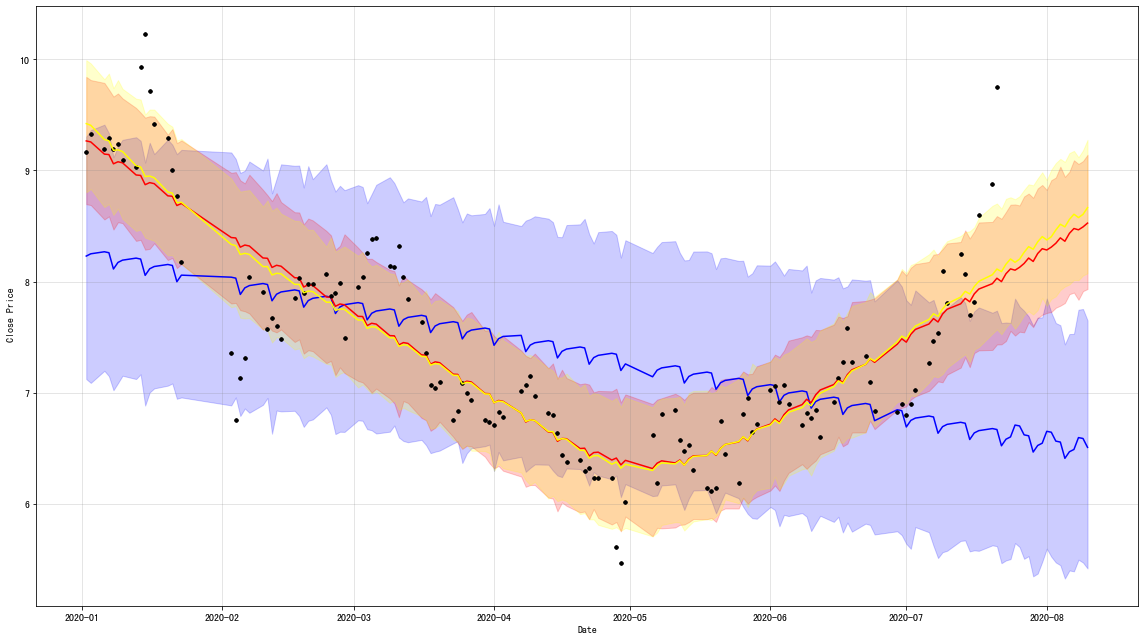

In [126]:
fig, ax = plt.subplots(figsize=(16,9))

# 此处代码运行时间较长，请耐心等待
for point, color in zip([0.01, 0.05, 0.1], ['blue', 'red', 'yellow']):
    temp_model = fbprophet.Prophet(changepoint_prior_scale=point, daily_seasonality=True)
    temp_model.fit(data)
    forecast = temp_model.make_future_dataframe(periods=20, freq='D') # 20 day
    forecast = temp_model.predict(forecast)
    plot(temp_model, forecast, ax=ax, xlabel = 'Date', ylabel = 'Close Price ¥', plot_color=color);

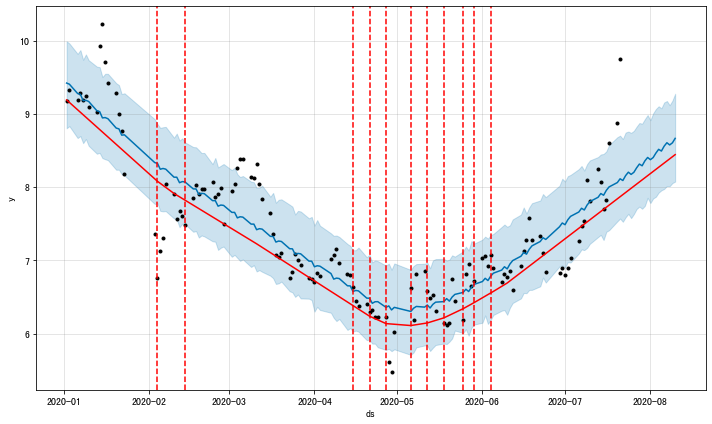

In [127]:
from fbprophet.plot import add_changepoints_to_plot

fig = model.plot(forecast) # 绘制预测图
a = add_changepoints_to_plot(fig.gca(), model, forecast) # 增加变化点

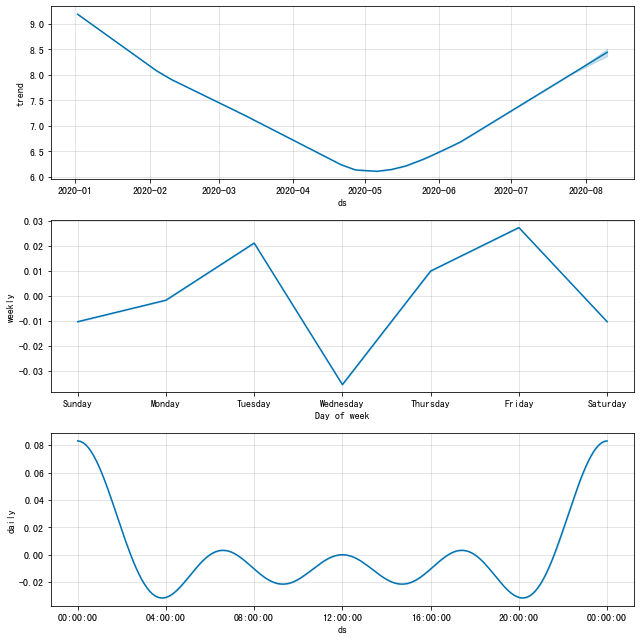

In [128]:
from fbprophet.plot import plot_components
model.plot_components(forecast); # 绘制多维度变化趋势图

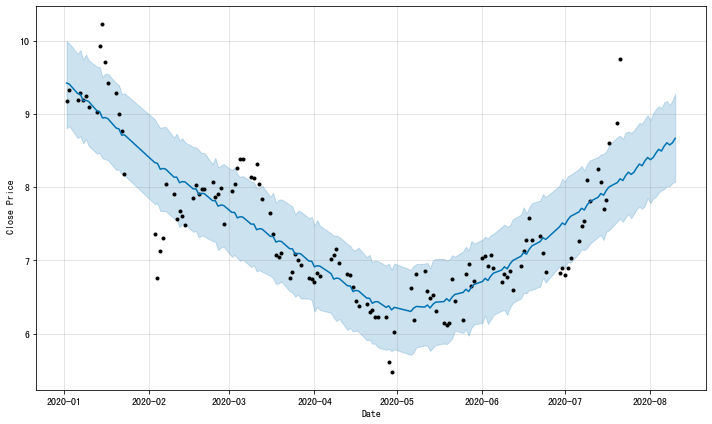

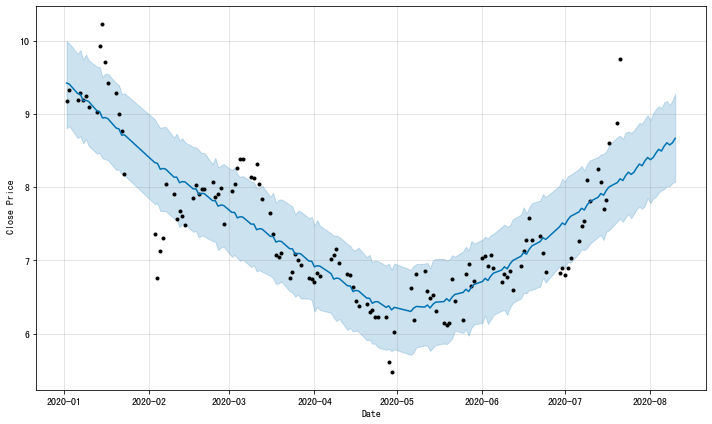

In [129]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Close Price ¥')

<AxesSubplot:xlabel='Date'>

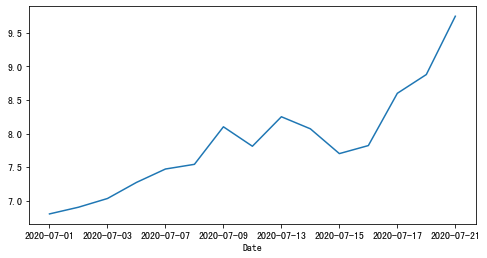

In [130]:
df['Close']['2020-07-01':'2020-08-01'].plot(figsize=(8,4))